Found 17 sample types with 24 total datasets to analyze.
Dataframe filtered to 2 from 24 total datasets
Saving config parameters to output_12Jan2024\hdxms_params_12Jan2024.py


Dataset 0 ( 1 of 2 )
Performing fits for LeuEnk_HI 0001-0005: YGGFL z=1
saving figure as  hdx_ms_hxex3_LeuEnk_HI0001-0005binom_isotope_p05_IndFits_bootNoise0p01_12Jan2024


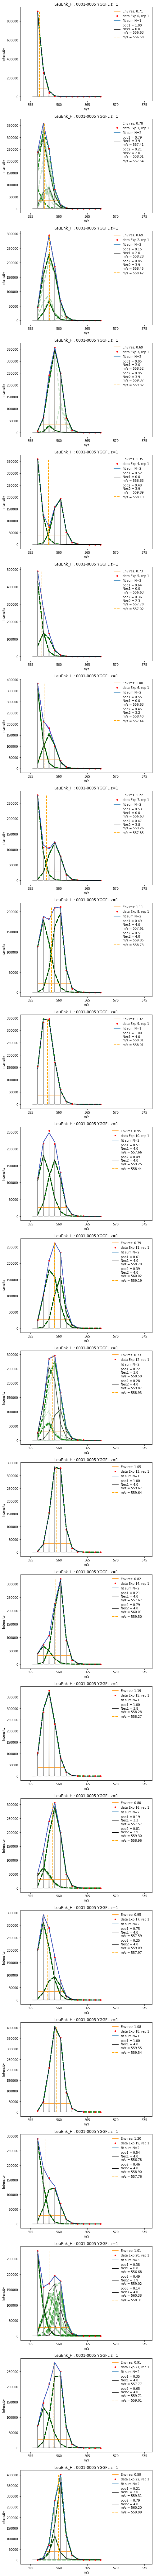

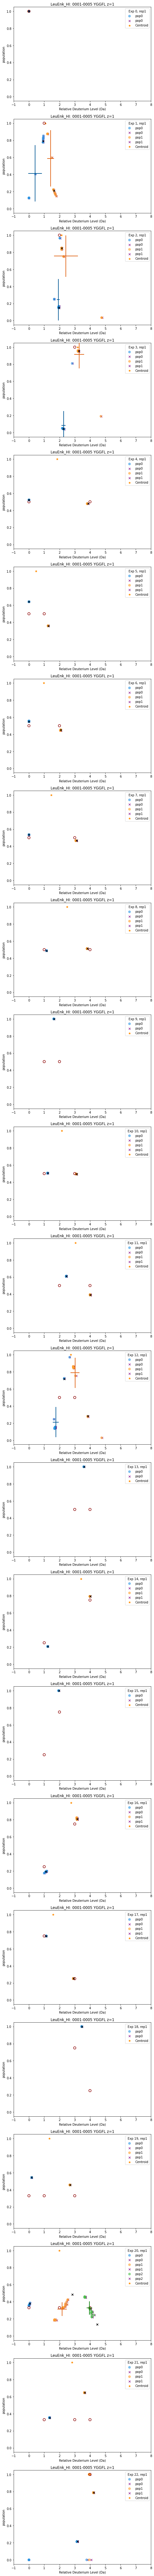

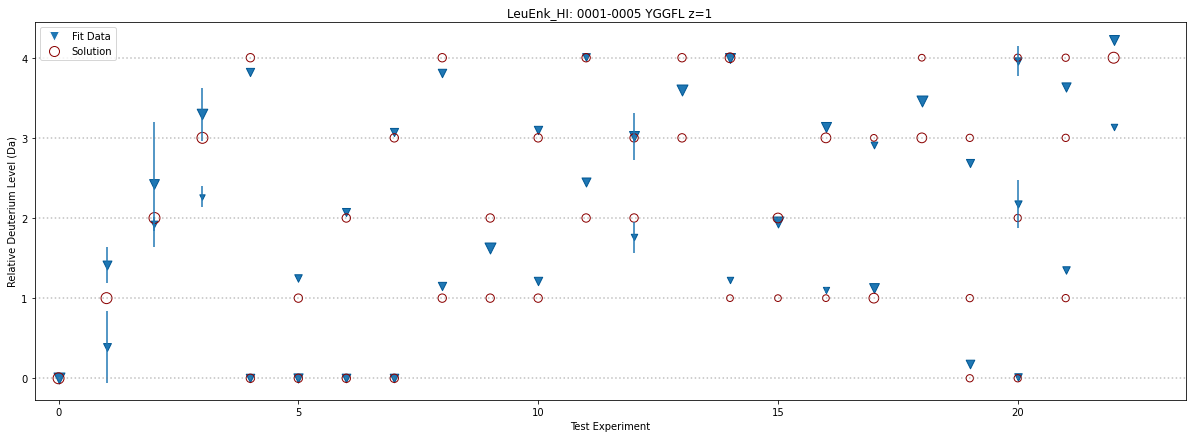

saving figure as  hdx_ms_hxex3_LeuEnk_HI0001-0005binom_isotope_p05_BootFits_bootNoise0p01_12Jan2024
saving figure as  hdx_ms_hxex3_LeuEnk_HI0001-0005binom_isotope_p05_ndeutBoot_bootNoise0p01_12Jan2024

Dataset 1 ( 2 of 2 )
Performing fits for LeuEnk_LO 0001-0005: YGGFL z=1
saving figure as  hdx_ms_hxex3_LeuEnk_LO0001-0005binom_isotope_p05_IndFits_bootNoise0p01_12Jan2024


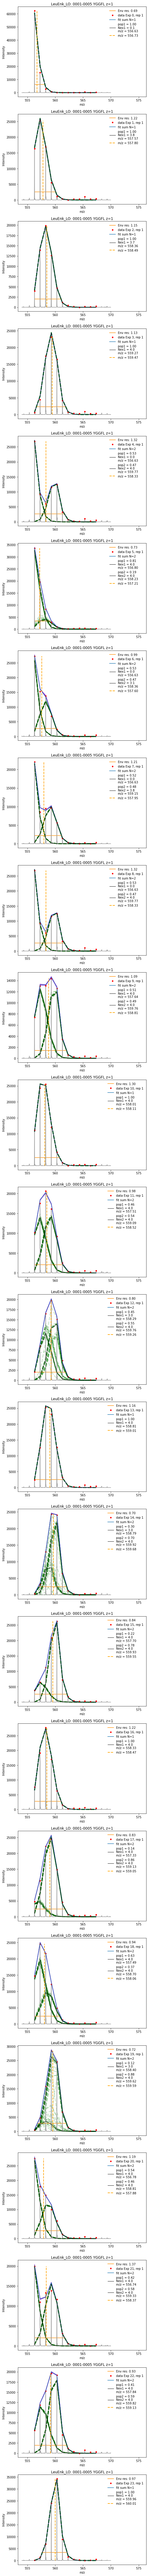

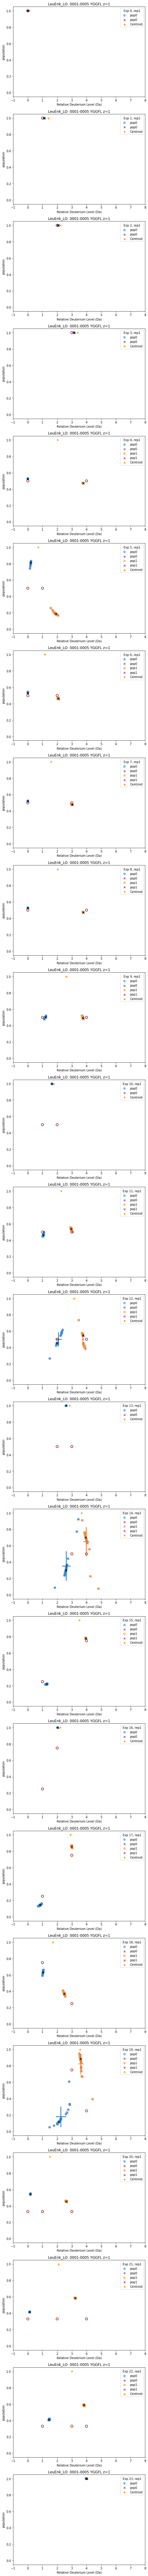

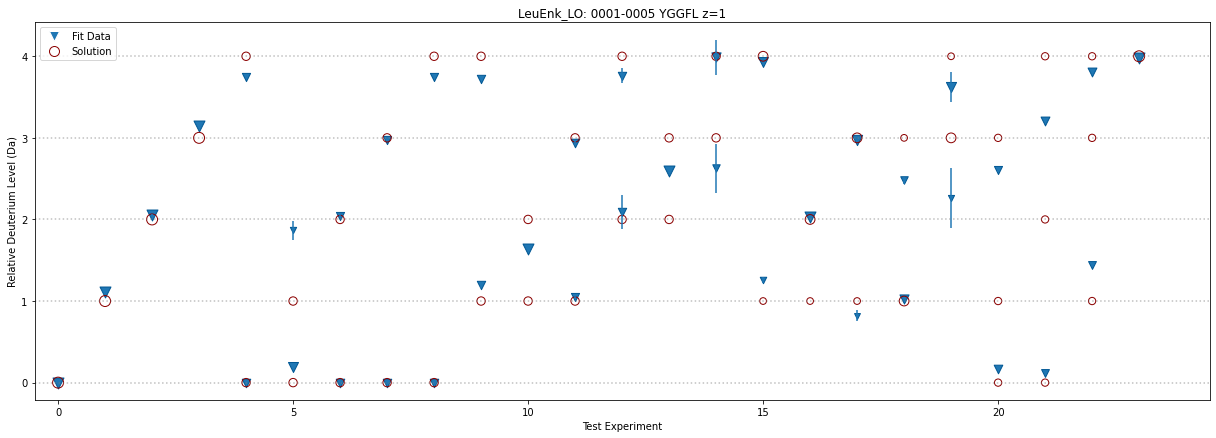

saving figure as  hdx_ms_hxex3_LeuEnk_LO0001-0005binom_isotope_p05_BootFits_bootNoise0p01_12Jan2024
saving figure as  hdx_ms_hxex3_LeuEnk_LO0001-0005binom_isotope_p05_ndeutBoot_bootNoise0p01_12Jan2024
Saving results table to C:\Users\tuttl\OneDrive\Documents\My Documents\KlevitHahn\hdx-ms\pyHXExpress\Bimodal_HDX_Data\output_12Jan2024\data_fits12Jan2024.csv


In [348]:
import os
import importlib
import pyhxexpress as hxex
import numpy as np, pandas as pd
#import config  
#import hdxms_params_22Dec2023 as config
import test_config as config

def hxex_reload():
    importlib.reload(hxex)
    importlib.reload(config)
    hxex.config = config

hxex_reload()
#help(hxex)

hxex.config.Hide_Figure_Output = False

# hxex.config.Output_DIR = os.path.join(config.Data_DIR,'output_fixedpops_'+str(config.date),'')
# if not os.path.exists(hxex.config.Output_DIR): os.makedirs(hxex.config.Output_DIR)


metadf = hxex.get_metadf()
#filtered = metadf[0:1]
filtered = hxex.filter_metadf(metadf,index=[*range(0,2)])#,charge=2, samples='B1B5')
#display(filtered)
hxex.run_hdx_fits(filtered)
#hxex.run_hdx_fits(metadf)

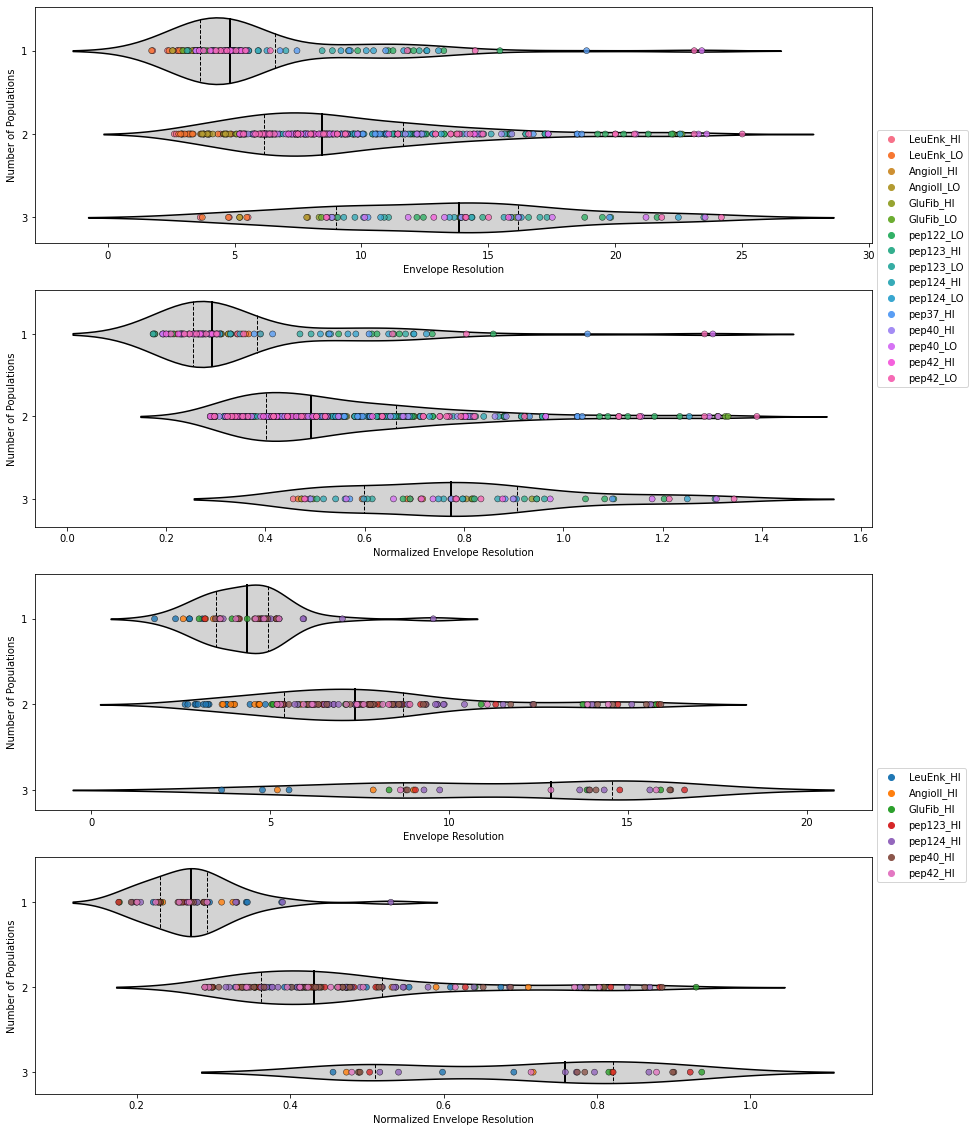

In [3]:
#this would clean up if plotted ~real~ envelopes instead of measured 

# env_res_1 = env_symmetry_adj *charge * (env[1]-env[0]) / ( 2.0 )
# env_symmetry_adj = 2.0 - (y.max() - env_Int)/y.max() # 0 -> assym, 1 -> symm  
                                                       # want 0 to be 2x and 1 to be 1x -> y = -1*x + 2

import seaborn as sns
import matplotlib.pyplot as plt

def patch_edges():
    from matplotlib.collections import PolyCollection
    
    for a in ax.flatten():
        for l in a.lines: #all
            l.set_color('black')
            l.set_linestyle('--')
            l.set_linewidth(1.0)
        for l in a.lines[1::3]: #center
            l.set_linestyle('-')
            l.set_linewidth(2.0)
        for art in a.get_children():
            if isinstance(art,PolyCollection):
                art.set_edgecolor((0.0,0.0,0.0))


all_data = hxex.data_fits.copy()
all_data = all_data[~all_data['sample'].str.contains('Brady')] #bradykinin data is rubbish
all_data['env_res_norm'] = all_data[['env_res_1','peptide']].apply(lambda x: x['env_res_1']/(len(x['peptide'])+3.0),axis=1)

hi_data = all_data.copy()[all_data['sample'].str.contains("HI")]
hi_data = hi_data[~hi_data['sample'].str.contains("pep37")]

fig, ax = plt.subplots(figsize=(15,20), ncols=1, nrows = 4,)# squeeze=False)

sns.violinplot(data=all_data,x='env_res_1',y='solution_npops',orient='h',order=(0,1,2,3,4),ax=ax[0],inner='quart',color='lightgrey')#color='white')
sns.scatterplot(data=all_data,x='env_res_1',y='solution_npops',hue='sample',ax=ax[0],legend=True,zorder=10,edgecolor='black',alpha=0.8)

sns.violinplot(data=hi_data,x='env_res_1',y='solution_npops',orient='h',order=(0,1,2,3,4),ax=ax[2],inner='quart',color='lightgrey');
sns.scatterplot(data=hi_data,x='env_res_1',y='solution_npops',marker='o',hue='sample',ax=ax[2],zorder=10,edgecolor='black',alpha=0.8);


sns.violinplot(data=all_data,x='env_res_norm',y='solution_npops',orient='h',order=(0,1,2,3,4),ax=ax[1],inner='quart',color='lightgrey')
sns.scatterplot(data=all_data,x='env_res_norm',y='solution_npops',hue='sample',ax=ax[1],legend=False,zorder=10,edgecolor='black',alpha=0.8)

sns.violinplot(data=hi_data,x='env_res_norm',y='solution_npops',orient='h',order=(0,1,2,3,4),ax=ax[3],inner='quart',color='lightgrey');
sns.scatterplot(data=hi_data,x='env_res_norm',y='solution_npops',marker='o',hue='sample',ax=ax[3],zorder=10,legend=False,edgecolor='black',alpha=0.8);

ax[0].legend(loc='upper left',bbox_to_anchor=(1,0.5))
ax[2].legend(loc='upper left',bbox_to_anchor=(1,0.2));
for i in range(4):
    if i%2 == 0: ax[i].set_xlabel('Envelope Resolution')
    else: ax[i].set_xlabel('Normalized Envelope Resolution')
    ax[i].set_ylabel('Number of Populations')

patch_edges()


In [4]:


# #Write / Read dataframe containing populations columns based on total results (easy way to have all datasets and timepts)

# hi_data['fit_npops'] = hi_data['solution_npops']
# saveto = os.path.join(config.Output_DIR,'testHI_data_fits.csv')
# hi_data.to_csv(saveto,index_label='Index')

# read_data_results = pd.read_csv(saveto).drop('Index',axis=1)

# #examples of manually changing the fit_npops values based on selection
# testidx = hxex.filter_metadf(hi_data,charge=2,timept=0,rep=1).index#['solution_npops'][0]
# testidx2 = hxex.filter_metadf(hi_data,charge=3,timept=0,rep=1).index#['solution_npops'][0]
# testdf = hi_data.copy()
# testdf['pop'] = np.nan
# testdf.loc[testidx,'pop'] = 2
# testdf.loc[testidx2,'pop']= 3
# testdf.loc[testidx | testidx2]

In [5]:
# #all_deut['solution_npops'] = hxex.solution['npops'][hxex.solution.time==timept].to_numpy()[0]
# all_deut, all_raw = hxex.get_data(metadf)
# all_deut['fit_npops'] = np.nan

# time_points = sorted(set(all_deut.time))
# n_time_points = len(time_points)

# for i in time_points:
#      filt_idx = hxex.filter_metadf(all_deut,timept=i,quiet=True).index
#      all_deut.loc[filt_idx,'fit_npops'] = hxex.solution['npops'][hxex.solution.time==i].to_numpy()[0]

# all_deut['solution_npops'] = all_deut['fit_npops']

# keep_cols = ['time','sample','peptide','charge','rep','peptide_range','fit_npops','solution_npops']
# test_config_df = all_deut.copy()[all_deut.n_deut==0][keep_cols]
# test_config_df.to_csv(os.path.join(config.Data_DIR,'test_config_df.csv'),index_label='Index')

Found 17 sample types with 24 total datasets to analyze.
Dataframe filtered to 3 from 24 total datasets
Saving config parameters to output_12Jan2024\hdxms_params_12Jan2024.py


Dataset 0 ( 1 of 3 )
Performing fits for LeuEnk_HI 0001-0005: YGGFL z=1
saving figure as  hdx_ms_hxex3_LeuEnk_HI0001-0005binom_isotope_p05_IndFits_bootNoise0p01_12Jan2024


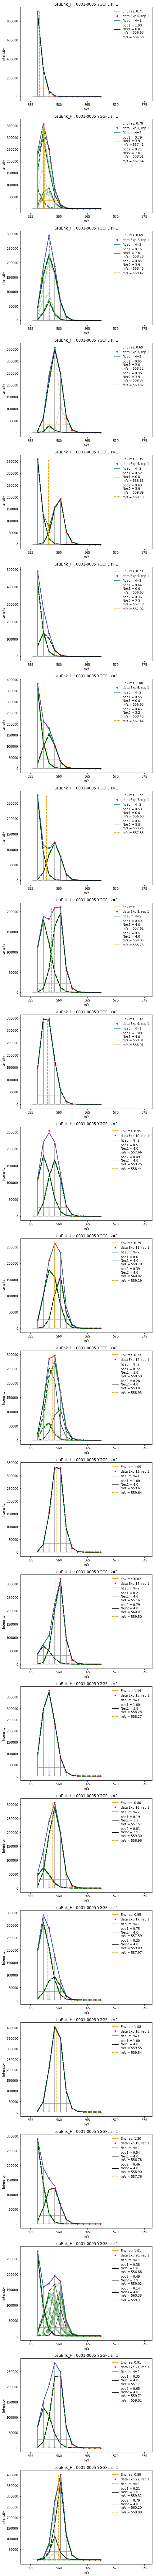

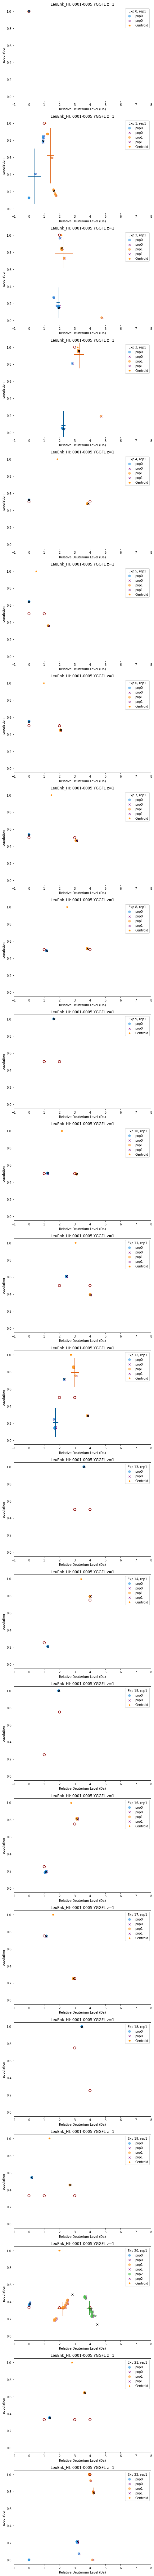

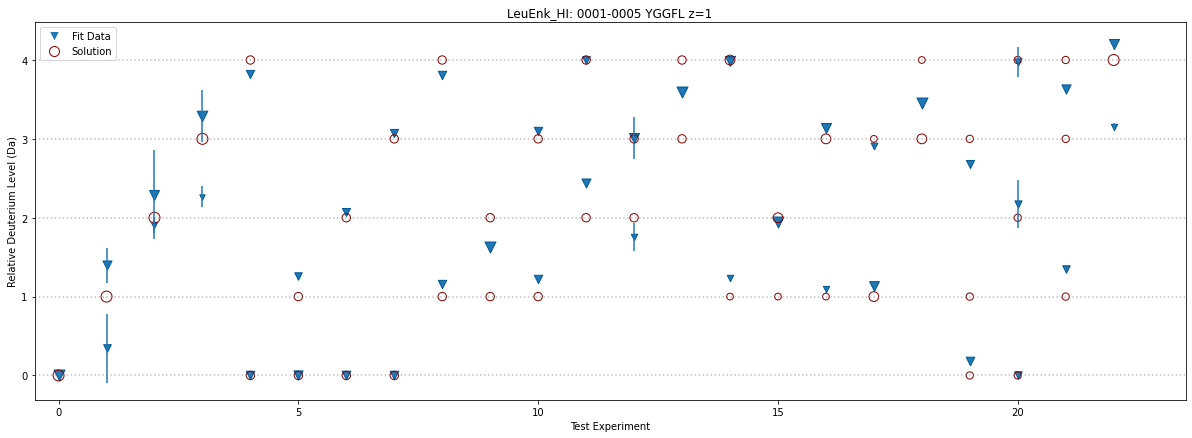

saving figure as  hdx_ms_hxex3_LeuEnk_HI0001-0005binom_isotope_p05_BootFits_bootNoise0p01_12Jan2024
saving figure as  hdx_ms_hxex3_LeuEnk_HI0001-0005binom_isotope_p05_ndeutBoot_bootNoise0p01_12Jan2024

Dataset 1 ( 2 of 3 )
Performing fits for LeuEnk_LO 0001-0005: YGGFL z=1
saving figure as  hdx_ms_hxex3_LeuEnk_LO0001-0005binom_isotope_p05_IndFits_bootNoise0p01_12Jan2024


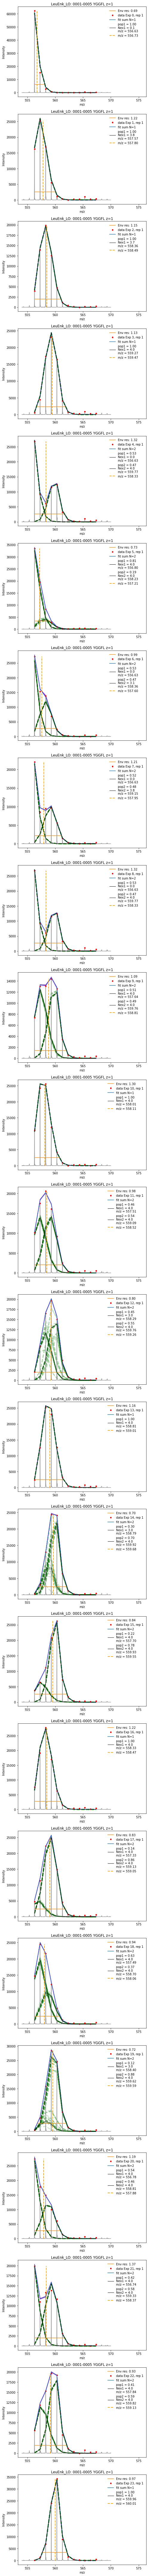

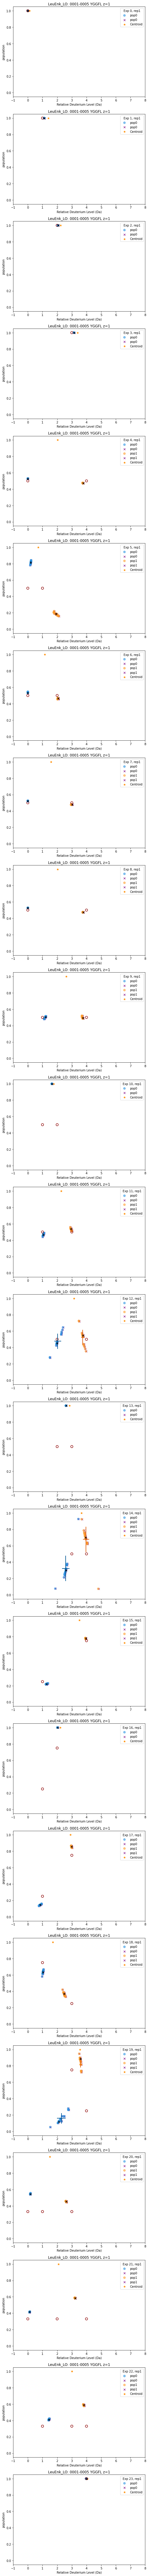

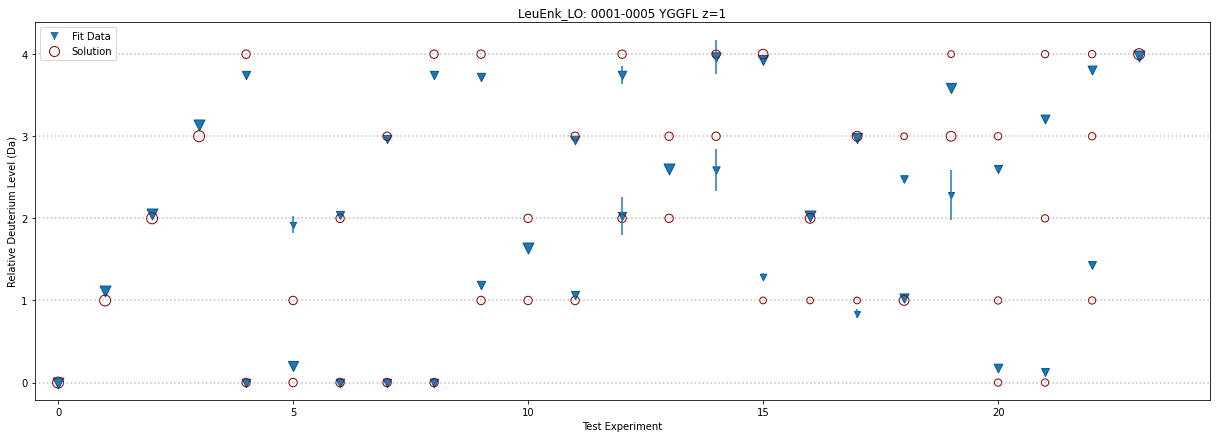

saving figure as  hdx_ms_hxex3_LeuEnk_LO0001-0005binom_isotope_p05_BootFits_bootNoise0p01_12Jan2024
saving figure as  hdx_ms_hxex3_LeuEnk_LO0001-0005binom_isotope_p05_ndeutBoot_bootNoise0p01_12Jan2024

Dataset 2 ( 3 of 3 )
Performing fits for AngioII_HI 0001-0008: DRVYIHPF z=2
min population below threshold: falling back to 2 curve(s)
saving figure as  hdx_ms_hxex3_AngioII_HI0001-0008binom_isotope_p05_IndFits_bootNoise0p01_12Jan2024


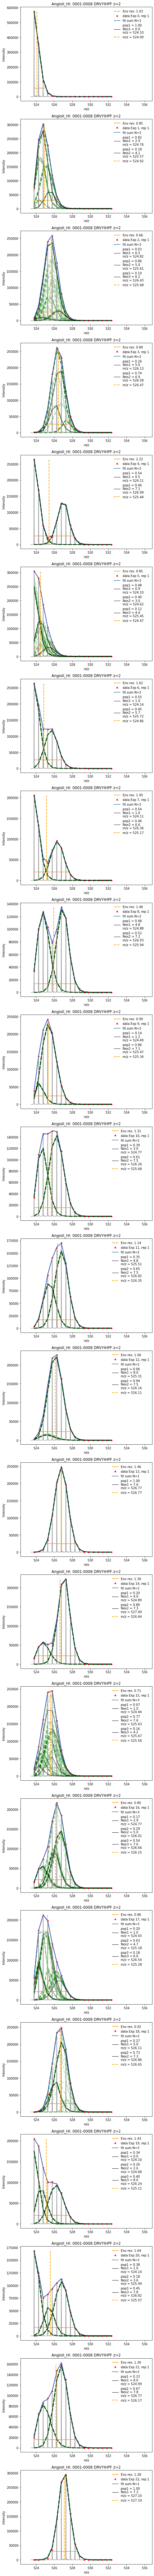

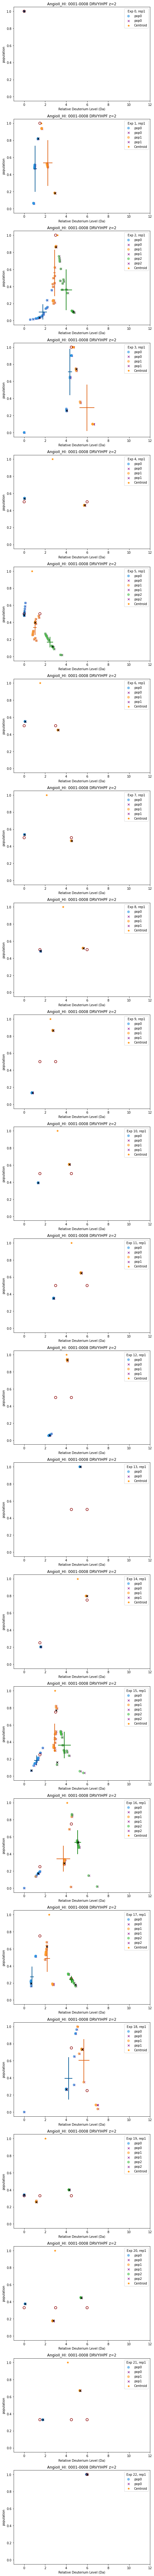

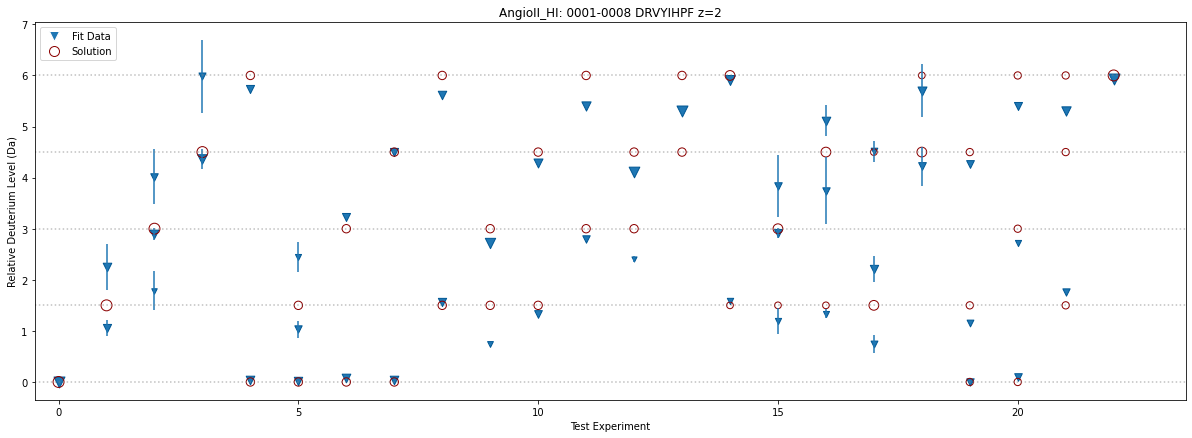

saving figure as  hdx_ms_hxex3_AngioII_HI0001-0008binom_isotope_p05_BootFits_bootNoise0p01_12Jan2024
saving figure as  hdx_ms_hxex3_AngioII_HI0001-0008binom_isotope_p05_ndeutBoot_bootNoise0p01_12Jan2024
Saving results table to C:\Users\tuttl\OneDrive\Documents\My Documents\KlevitHahn\hdx-ms\pyHXExpress\Bimodal_HDX_Data\output_12Jan2024\data_fits12Jan2024.csv


In [343]:
# def hxex_reload():
#     importlib.reload(hxex)
#     importlib.reload(config)
#     hxex.config = config

hxex_reload()

# filtered = hxex.filter_metadf(metadf,samples='pep124_HI',charge=4)
# #filtered = metadf[0:1]
# hxex.run_hdx_fits(filtered)


hxex.config.Output_DIR = os.path.join(config.Data_DIR,'output_'+str(config.date),'')
if not os.path.exists(hxex.config.Output_DIR): os.makedirs(hxex.config.Output_DIR)


metadf = hxex.get_metadf()
#filtered = metadf[0:1]
filtered = hxex.filter_metadf(metadf,index=[*range(0,3)])#,charge=2, samples='B1B5')
#display(filtered)
hxex.run_hdx_fits(filtered)
#hxex.run_hdx_fits(metadf)

In [3]:
hxex.data_fits

time  rep    centroid      sample   peptide peptide_range  charge  \
0         0    1  556.576154   LeuEnk_HI     YGGFL     0001-0005       1   
1        60    1  557.541682   LeuEnk_HI     YGGFL     0001-0005       1   
2       120    1  558.415242   LeuEnk_HI     YGGFL     0001-0005       1   
3       180    1  559.318773   LeuEnk_HI     YGGFL     0001-0005       1   
4       240    1  558.186090   LeuEnk_HI     YGGFL     0001-0005       1   
..      ...  ...         ...         ...       ...           ...     ...   
65     1080    1  526.653388  AngioII_HI  DRVYIHPF     0001-0008       2   
66     1140    1  525.108143  AngioII_HI  DRVYIHPF     0001-0008       2   
67     1200    1  525.572065  AngioII_HI  DRVYIHPF     0001-0008       2   
68     1260    1  526.174471  AngioII_HI  DRVYIHPF     0001-0008       2   
69  1000000    1  527.101049  AngioII_HI  DRVYIHPF     0001-0008       2   

    solution_npops  env_res_1  icentroid_1  ...  ipop_std_2     imu_2  \
0                1   1.773513   556.631728  ...         NaN       NaN   
1                1   3.111808   557.411990  ...         1.0  0.684171   
2                1   2.743066   558.277782  ...         1.0  0.458438   
3                1   2.754567   558.518607  ...         1.0  0.700855   
4                2   5.397880   556.631728  ...         1.0  0.820281   
..             ...        ...          ...  ...         ...       ...   
65               2   3.686822   526.110032  ...         1.0  0.754041   
66               3   7.885216   524.098315  ...         1.0  0.438628   
67               3   9.016874   524.142903  ...         1.0  0.747021   
68               3   5.207847   524.988859  ...         1.0  0.682202   
69               1   3.198747   527.097237  ...         NaN       NaN   

      iNex_2    iNex_std_2  icentroid_3    ipop_3  ipop_std_3     imu_3  \
0        NaN           NaN          NaN       NaN         NaN       NaN   
1   2.000000  5.080188e+07          NaN       NaN         NaN       NaN   
2   3.930205  2.993199e+08          NaN       NaN         NaN       NaN   
3   3.857548  1.100391e+08          NaN       NaN         NaN       NaN   
4   3.912723  1.126586e+08          NaN       NaN         NaN       NaN   
..       ...           ...          ...       ...         ...       ...   
65  7.267202  8.485905e-01          NaN       NaN         NaN       NaN   
66  2.629918  1.030406e+06   526.242274  0.400375         1.0  0.532673   
67  3.636705  7.566039e+05   526.821625  0.446258         1.0  0.693292   
68  7.772980  7.076670e+00          NaN       NaN         NaN       NaN   
69       NaN           NaN          NaN       NaN         NaN       NaN   

      iNex_3    iNex_std_3  
0        NaN           NaN  
1        NaN           NaN  
2        NaN           NaN  
3        NaN           NaN  
4        NaN           NaN  
..       ...           ...  
65       NaN           NaN  
66  8.000000  2.633031e+07  
67  7.799978  2.258085e+07  
68       NaN           NaN  
69       NaN           NaN  

[70 rows x 28 columns]

In [152]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from IPython.display import display, Markdown, Latex
from sklearn.datasets import make_blobs
from matplotlib.widgets import Slider
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

tf.keras.utils.set_random_seed(256)

from sklearn.model_selection import train_test_split


X_features = ['env_width','env_symm','max_namides']
data = hxex.data_fits[hxex.data_fits['sample'].str.contains('HI')]
X = data[X_features].to_numpy()
y = data[['solution_npops']].to_numpy().ravel() - 1 #-1 to be 0,1,2 

X = np.asarray(X).astype('float32')
y = np.asarray(y).astype('float32')

normalization_layer = tf.keras.layers.experimental.preprocessing.Normalization()
normalization_layer.adapt(X)

X_train, X_val, y_train, y_val = train_test_split(X,y,stratify=y,test_size=0.15)

#y = [1 if yt > 1 else 0 for yt in y_train]
#y = np.array(y)


2/2 [==============================] - 0s 2ms/step


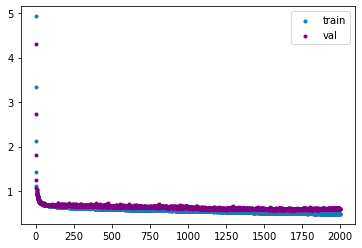

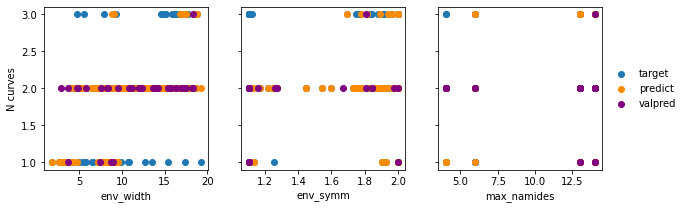

In [158]:
class GetWeights(tf.keras.callbacks.Callback):
    # Keras callback which collects values of weights and biases at each epoch
    def __init__(self):
        super(GetWeights, self).__init__()
        self.weight_dict = {}

    def on_epoch_end(self, epoch, logs=None):
        # this function runs at the end of each epoch

        # loop over each layer and get weights and biases
        for layer_i in range(len(self.model.layers)):
            w = self.model.layers[layer_i].get_weights()[0]
            b = self.model.layers[layer_i].get_weights()[1]
            #print('Layer %s has weights of shape %s and biases of shape %s' %(
            #    layer_i, np.shape(w), np.shape(b)))

            # save all weights and biases inside a dictionary
            if epoch == 0:
                # create array to hold weights and biases
                self.weight_dict['w_'+str(layer_i+1)] = w
                self.weight_dict['b_'+str(layer_i+1)] = b
            else:
                # append new weights to previously-created weights array
                self.weight_dict['w_'+str(layer_i+1)] = np.dstack(
                    (self.weight_dict['w_'+str(layer_i+1)], w))
                # append new weights to previously-created weights array
                self.weight_dict['b_'+str(layer_i+1)] = np.dstack(
                    (self.weight_dict['b_'+str(layer_i+1)], b))

preferred_model = Sequential(
    [ 
        #Dense(64, activation = 'relu'),
        Dense(25, activation = 'relu'),
        #Dropout(0.1),
        Dense(15, activation = 'relu'),
        Dense(3, activation = 'linear')   
    ]
)
preferred_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999),
)
gw = GetWeights()
history = preferred_model.fit(
    X_train,y_train, verbose=0,callbacks=[gw],
    validation_data=(X_val,y_val),
    epochs=2000
)

# for k,v in gw.weight_dict.items():
#     print (k,v)
#test = gw.weight_dict['w_1'][0]
plt.scatter(np.arange(0,len(history.history['loss'])),history.history['loss'],label='train',marker='.');
plt.scatter(np.arange(0,len(history.history['val_loss'])),history.history['val_loss'],color='purple',label='val',marker='.');
plt.legend()

train_pred = preferred_model.predict(X_train)
val_pred = preferred_model.predict(X_val)
#sm_preferred = tf.nn.softmax(p_preferred).numpy()
y_trainpred = np.argmax(train_pred,axis=1)
y_valpred = np.argmax(val_pred,axis=1)
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,len(X_features),figsize=(10,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train+1, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_trainpred+1,color="darkorange", label = 'predict')
    ax[i].scatter(X_val[:,i],y_valpred+1,color="purple", label = 'valpred',marker='o')
ax[0].set_ylabel("N curves"); 
ax[2].legend(loc='center left',bbox_to_anchor=(1,0.5),frameon=False);
#fig.suptitle("target versus prediction")
plt.show()

2/2 [==============================] - 0s 3ms/step


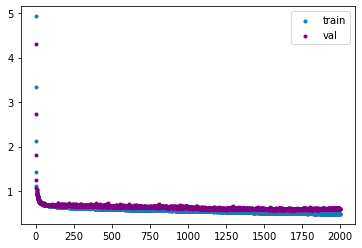

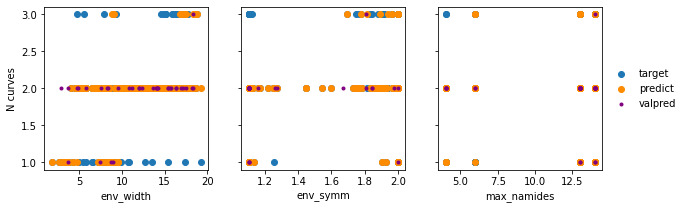

In [220]:
plt.scatter(np.arange(0,len(history.history['loss'])),history.history['loss'],label='train',marker='.');
plt.scatter(np.arange(0,len(history.history['val_loss'])),history.history['val_loss'],color='purple',label='val',marker='.');
plt.legend()


train_pred = preferred_model.predict(X_train)
val_pred = preferred_model.predict(X_val)
#sm_preferred = tf.nn.softmax(p_preferred).numpy()
y_trainpred = np.argmax(train_pred,axis=1)
y_valpred = np.argmax(val_pred,axis=1)
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,len(X_features),figsize=(10,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train+1, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_trainpred+1,color="darkorange", label = 'predict')
    ax[i].scatter(X_val[:,i],y_valpred+1,color="purple", label = 'valpred',marker='.')
ax[0].set_ylabel("N curves"); 
ax[2].legend(loc='center left',bbox_to_anchor=(1,0.5),frameon=False);
#fig.suptitle("target versus prediction")
plt.show()

In [126]:
for k,v in history.history.items():
    print (k)

loss
val_loss


10/10 [==============================] - 0s 997us/step


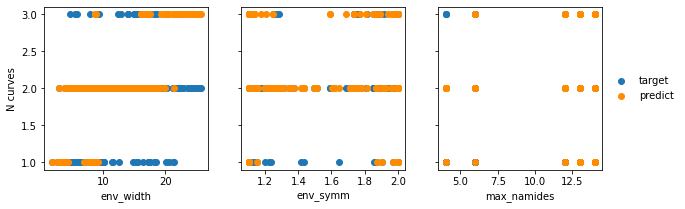

In [168]:
lo_data = hxex.data_fits[hxex.data_fits['sample'].str.contains('LO')]
X_lo = lo_data[X_features].to_numpy().astype('float32')
y_lo = lo_data['solution_npops'].to_numpy().astype('float32').ravel()-1

testlo_pred = preferred_model.predict(X_lo)
#sm_preferred = tf.nn.softmax(p_preferred).numpy()
y_lopred = np.argmax(testlo_pred,axis=1)
# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,len(X_features),figsize=(10,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_lo[:,i],y_lo+1, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_lo[:,i],y_lopred+1,color="darkorange", label = 'predict')
ax[0].set_ylabel("N curves"); 
ax[2].legend(loc='center left',bbox_to_anchor=(1,0.5),frameon=False);
#fig.suptitle("target versus prediction")
plt.show()

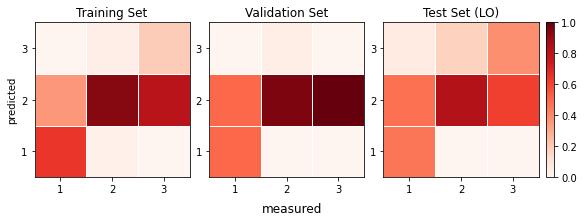

In [340]:
from matplotlib import cm
fig,ax=plt.subplots(1,3,figsize=(8,3),sharey=False,constrained_layout=True)
offset = 1
heatmap, xedges, yedges = np.histogram2d(y_trainpred+offset,y_train+offset,bins=3)
heatmap = heatmap/heatmap.sum(axis=0)
hm = ax[0].pcolormesh(xedges,yedges,heatmap,cmap='Reds',vmin=0,vmax=1.0,edgecolors='w')
heatmap, xedges, yedges = np.histogram2d(y_valpred+offset,y_val+offset,bins=3)
heatmap = heatmap/heatmap.sum(axis=0)
hm = ax[1].pcolormesh(xedges,yedges,heatmap,cmap='Reds',vmin=0,vmax=1.0,edgecolors='w')
heatmap, xedges, yedges = np.histogram2d(y_lopred+offset,y_lo+offset,bins=3)
heatmap = heatmap/heatmap.sum(axis=0)
hm = ax[2].pcolormesh(xedges,yedges,heatmap,cmap='Reds',vmin=0,vmax=1.0,edgecolors='w')

ax[0].set_ylabel("predicted")
fig.supxlabel("measured")
for i in range(3):
    ax[i].set_xticks([4/3,2,8/3]); ax[i].set_yticks([4/3,2,8/3]);
    ax[i].set_xticklabels(['1','2','3']); ax[i].set_yticklabels(['1','2','3']); 
for axes in ax[:3]:
    axes.set_aspect(1)
fig.colorbar(hm,fraction=0.05,pad=0.05);
ax[0].set_title("Training Set")
ax[1].set_title("Validation Set")
ax[2].set_title("Test Set (LO)");
#fig.tight_layout() #not compatible with constrained_layout
#heatmap

In [342]:
hxex.data_fit

time rep    centroid    sample          peptide peptide_range charge  \
0  1000000   1  643.621876  pep42_LO  RDKVQKEYALFYKLD     0001-0015      3   

  env_width env_symm max_namides  ...     iNex_2   iNex_std_2 icentroid_3  \
0  7.761051      1.1          14  ...  14.076446  1319.764855  643.698075   

    iD_corr3    ipop_3 ipop_std_3     imu_3     iNex_3 iNex_std_3  \
0  13.973503  0.443656        1.0  0.913801  12.898341  28.825672   

  solution_npops  
0              1  

[1 rows x 33 columns]